# Task 4.3: K-Nearest Neighbours

In this notebook we are going to see how to use built-in K-nearest neighbors functions. You will be provided with some already complete code as well as a coding task that you should complete yourself. In particular, you will have to:

* use the function `KNNClassifier(X_train, y_train, X_test, k)` that will make use of the pre-built implementation of K-Nearest Neighbours to compare the k parameter versus accuracy score.



## 1.Import libraries
The required libraries for this notebook are pandas, sklearn, numpy and matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import *
import pandas as pd
from sklearn.datasets import  load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## 2.Load the data
The data we are using is from iris dataset, which we can access directly from the scikit learn library . It consists of 150 data points and 4 features.

In [2]:
#add another column that contains the Species which in scikit learn datasets are considered as target
irisData=load_iris() # get the data
print(irisData.data.shape) # shape of data: 150 data points and 4 features
print(irisData.feature_names)# Feature_names of data
irisData_df=pd.DataFrame(irisData.data,columns=irisData.feature_names) # convert the irisData.data to a a dataframe
irisData_df['Species']=irisData.target # there is no column called ‘Species’ in the data frame because the target column is available in another attribute called target
newX=irisData_df.drop('Species',axis=1) # All other features
newY=irisData_df['Species'] # Species types
irisData_df.head()

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3) 
#test_size= should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#everytime you run it without specifying random_state, you will get a different result, this is expected behavior
#print (len(X_test), len(y_test))

print('train set: {}  | test set: {}'.format(round(((len(y_train)*1.0)/len(newX)),3),
                                                       round((len(y_test)*1.0)/len(newX),3)))


train set: 0.7  | test set: 0.3


## 3.Use K-nearest neighbours from a library
We will first see how K-nearest neighbors can be implemented using already available functions from the scikit-learn library. We also evaluate the KNN algorithm using score metric.
The score-accuracy metric is as follows:
\begin{align}
accuracy(y,\hat{y})=\frac{1}{n}\sum_{i=1}^{n} 1(\hat{y}_i=y_i)
\end{align}

In [4]:
def KNNClassifier(X_train, y_train, X_test, y_test, k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model


    Y_pred = neigh.predict(X_test)
    score = metrics.accuracy_score(y_test,Y_pred)
    
    return Y_pred , score

Y_pred , score = KNNClassifier(X_train, y_train, X_test, y_test, 4)

print(score)



0.9555555555555556


## 4.Your Task
 Plot the relationship between the values of K=[1:35] and the corresponding testing accuracy using the matplotlib library. Discuss the optimum value of K!





In [5]:
K = np.arange(start=1, stop=36)

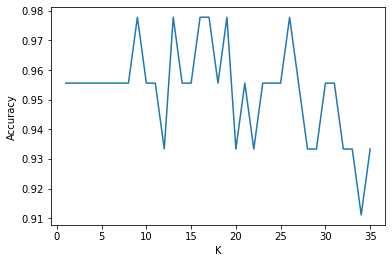

In [6]:
scores = []
for neighbors in K:
    _, score = KNNClassifier(X_train, y_train, X_test, y_test, neighbors)
    scores.append(score)
    
plt.plot(K, scores)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.show()